In [29]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin_sort.csv"
path_mg_HLMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/HLMartin_sort.csv"
path_mg_Atlas_12 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasSecondLevel_sort.csv"
path_mg_AtlasScores_12 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasSecondLevelScores_sort.csv"
path_mg_Atlas_7 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasTopLevel_sort.csv"
path_mg_AtlasScores_7 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasTopLevelScores_sort.csv"

In [50]:
path = path_mg_AtlasScores_7
# read in df from path_mg_BasicMartin, first column as index
mg = pd.read_csv(path, index_col=0)
mg

,Hepatocyte,Endothelial cell,Cholangiocyte,Kupffer cell,Stromal cell,B cell,Other immune cells
Adamtsl2,0.0,0.0,0.0,0.0,6.5,0.0,0.0
Adgre1,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Adgrg6,0.0,0.0,2.8,0.0,0.0,0.0,0.0
Axl,0.0,0.0,0.0,4.8,0.0,0.0,0.0
C5ar1,0.0,0.0,0.0,2.6,0.0,0.0,0.0
Ccr2,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Ccr7,0.0,0.0,0.0,0.0,0.0,5.6,0.0
Cd14,0.0,0.0,1.1,2.8,0.0,0.0,0.0
Cd19,0.0,0.0,0.0,0.0,0.0,8.2,0.0
Cd207,0.0,0.0,0.0,5.1,0.0,0.0,0.0


Hepatocyte            38.7
Endothelial cell      44.2
Cholangiocyte         44.8
Kupffer cell          89.8
Stromal cell          94.0
B cell                25.5
Other immune cells    30.0
dtype: float64


,Hepatocyte,Endothelial cell,Cholangiocyte,Kupffer cell,Stromal cell,B cell,Other immune cells
Hepatocyte,1.000,0.000,0.125,0.000,0.091,0.000,0.000
Endothelial cell,0.000,1.000,0.059,0.074,0.043,0.077,0.071
Cholangiocyte,0.125,0.059,1.000,0.036,0.043,0.000,0.071
Kupffer cell,0.000,0.074,0.036,1.000,0.029,0.000,0.000
Stromal cell,0.091,0.043,0.043,0.029,1.000,0.000,0.000
B cell,0.000,0.077,0.000,0.000,0.000,1.000,0.100
Other immune cells,0.000,0.071,0.071,0.000,0.000,0.100,1.000


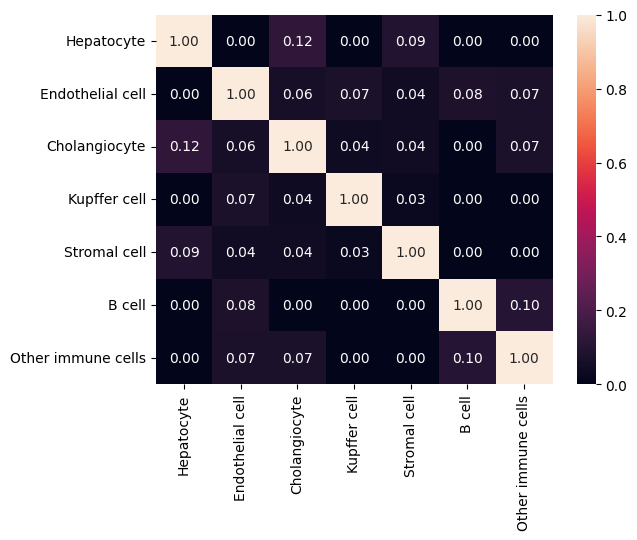

In [49]:
Jaccard_similarity_matrix(path,'')

In [4]:
rows = ['All markers','Hepa markers','Chol markers','LSEC markers','Portal vein markers','Central vein markers','Stel markers','Fibr markers','Meso markers','Kupf markers','B cell markers','Portal LAM markers','Oth im markers']
columns = ['In all lists','In Basic and HL Martin, not in Atlas','In Basic Martin and Atlas, not in HL Martin','In HL Martin and Atlas, not in Basic Martin','Only in Basic Martin','Only in HL Martin','Only in Atlas']
cell_types = ['Hepa','Chol','LSEC','Portal vein','Central vein','Stel','Fibr','Meso','Kupf','B cell','Portal LAM','Oth im']
# make dataframe
df = pd.DataFrame(index=rows,columns=columns)
df = df.fillna(0)
i = 1
for ct in cell_types:
    set_basic = set(mg_BasicMartin.iloc[:,0][set(mg_BasicMartin[mg_BasicMartin[ct]>0].index)])
    set_HL = set(mg_HLMartin.iloc[:,0][set(mg_HLMartin[mg_HLMartin[ct]>0].index)])
    set_Atlas = set(mg_Atlas.iloc[:,0][set(mg_Atlas[mg_Atlas[ct]>0].index)])
    set_all_lists = set_basic.intersection(set_HL).intersection(set_Atlas)
    set_basic_HL = set_basic.intersection(set_HL).difference(set_Atlas)
    set_basic_Atlas = set_basic.intersection(set_Atlas).difference(set_HL)
    set_HL_Atlas = set_HL.intersection(set_Atlas).difference(set_basic)
    set_only_basic = set_basic.difference(set_HL).difference(set_Atlas)
    set_only_HL = set_HL.difference(set_basic).difference(set_Atlas)
    set_only_Atlas = set_Atlas.difference(set_basic).difference(set_HL)
    df['In all lists'][i] = len(set_all_lists)
    df['In Basic and HL Martin, not in Atlas'][i] = len(set_basic_HL)
    df['In Basic Martin and Atlas, not in HL Martin'][i] = len(set_basic_Atlas)
    df['In HL Martin and Atlas, not in Basic Martin'][i] = len(set_HL_Atlas)
    df['Only in Basic Martin'][i] = len(set_only_basic)
    df['Only in HL Martin'][i] = len(set_only_HL)
    df['Only in Atlas'][i] = len(set_only_Atlas)
    i += 1
for c in df.columns:
    df[c][0] = df[c][1:].sum()
# switch columns and rows
df_transposed = df.transpose()
df_transposed

,All markers,Hepa markers,Chol markers,LSEC markers,Portal vein markers,Central vein markers,Stel markers,Fibr markers,Meso markers,Kupf markers,B cell markers,Portal LAM markers,Oth im markers
In all lists,88,4,7,7,4,6,10,13,5,16,4,6,6
"In Basic and HL Martin, not in Atlas",11,0,0,0,1,1,0,3,0,0,0,6,0
"In Basic Martin and Atlas, not in HL Martin",9,4,0,1,0,0,4,0,0,0,0,0,0
"In HL Martin and Atlas, not in Basic Martin",16,1,1,2,0,1,2,5,0,2,1,1,0
Only in Basic Martin,7,2,0,3,0,0,2,0,0,0,0,0,0
Only in HL Martin,21,1,0,1,2,2,3,3,2,5,0,2,0
Only in Atlas,12,0,1,0,1,0,0,0,3,2,0,5,0


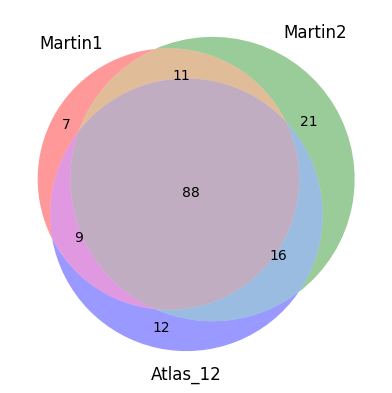

In [5]:
from matplotlib_venn import venn3
markers = 'All markers'
venn3(subsets = (df['Only in Basic Martin'][markers],df['Only in HL Martin'][markers],df['In Basic and HL Martin, not in Atlas'][markers],df['Only in Atlas'][markers],df['In Basic Martin and Atlas, not in HL Martin'][markers],df['In HL Martin and Atlas, not in Basic Martin'][markers],df['In all lists'][markers]),set_labels=('Martin1', 'Martin2', 'Atlas_12'))
plt.show()

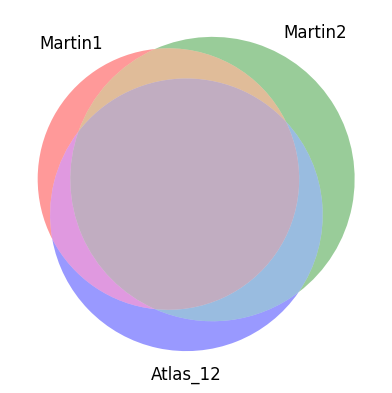

In [6]:
mg_BasicMartin = mg_BasicMartin.set_index('Column1')
nonzero = [(i, c) for i in mg_BasicMartin.index for c in mg_BasicMartin.columns if mg_BasicMartin.loc[i, c] > 0]
set1 = set(nonzero)

mg_HLMartin = mg_HLMartin.set_index('Column1')
nonzero = [(i, c) for i in mg_HLMartin.index for c in mg_HLMartin.columns if mg_HLMartin.loc[i, c] > 0]
set2 = set(nonzero)

mg_Atlas = mg_Atlas.set_index('Unnamed: 0')
nonzero = [(i, c) for i in mg_Atlas.index for c in mg_Atlas.columns if mg_Atlas.loc[i, c] > 0]
set3 = set(nonzero)

out = venn3([set1, set2, set3], ('Martin1', 'Martin2', 'Atlas_12'))
for idx, subset in enumerate(out.subset_labels):
    out.subset_labels[idx].set_visible(False)

plt.show(out)

In [70]:
df2 = pd.DataFrame(index=['Basic Martin','HL Martin','Atlas'],columns=rows)
df2 = df2.fillna(0)
df2
for r in rows:
    df2[r]['Basic Martin'] = df['In all lists'][r] + df['In Basic and HL Martin, not in Atlas'][r] + df['In Basic Martin and Atlas, not in HL Martin'][r] + df['Only in Basic Martin'][r]
    df2[r]['HL Martin'] = df['In all lists'][r] + df['In Basic and HL Martin, not in Atlas'][r] + df['In HL Martin and Atlas, not in Basic Martin'][r] + df['Only in HL Martin'][r]
    df2[r]['Atlas'] = df['In all lists'][r] + df['In Basic Martin and Atlas, not in HL Martin'][r] + df['In HL Martin and Atlas, not in Basic Martin'][r] + df['Only in Atlas'][r]
df2    

,All markers,Hepa markers,Chol markers,LSEC markers,Portal vein markers,Central vein markers,Stel markers,Fibr markers,Meso markers,Kupf markers,B cell markers,Portal LAM markers,Oth im markers
Basic Martin,115,10,7,11,5,7,16,16,5,16,4,12,6
HL Martin,136,6,8,10,7,10,15,24,7,23,5,15,6
Atlas,125,9,9,10,5,7,16,18,8,20,5,12,6
